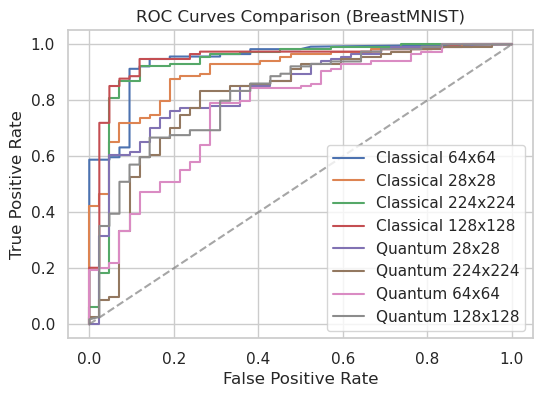

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_roc(csv_folders, alias_map=None):
    """Plota múltiplas curvas ROC de diferentes diretórios."""
    plt.figure(figsize=(6, 4))
    sns.set(style='whitegrid')
    
    if isinstance(csv_folders, str):
        csv_folders = [csv_folders]
    
    for folder in csv_folders:
        for file in os.listdir(folder):
            if file.endswith(".csv"):
                file_path = os.path.join(folder, file)
                df = pd.read_csv(file_path)
                
                if {'False Positive Rate', 'True Positive Rate'}.issubset(df.columns):
                    label = alias_map.get(file, file[:-4]) if alias_map else file[:-4]
                    plt.plot(df['False Positive Rate'], df['True Positive Rate'], label=label)
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves Comparison (BreastMNIST)")
    plt.legend()
    plt.show()

csv_folders = [
    "/home/eflammere/BreastCancerQuanvolution/graphic/classical",
    "/home/eflammere/BreastCancerQuanvolution/graphic/quantum/data_mnist"
]

alias_dict = {
    "roc_curve_data_BreastMNIST_28_classical.csv": "Classical 28x28",
    "roc_curve_data_BreastMNIST_64_classical.csv": "Classical 64x64",
    "roc_curve_data_BreastMNIST_128_classical.csv": "Classical 128x128",
    "roc_curve_data_BreastMNIST_224_classical.csv": "Classical 224x224",
    "roc_curve_data_BreastMNIST_28.csv": "Quantum 28x28",
    "roc_curve_data_BreastMNIST_64.csv": "Quantum 64x64",
    "roc_curve_data_BreastMNIST_128.csv": "Quantum 128x128",
    "roc_curve_data_BreastMNIST_224.csv": "Quantum 224x224"
}

# Chamada da função com múltiplos diretórios
plot_combined_roc(csv_folders, alias_map=alias_dict)
